<a href="https://colab.research.google.com/github/evanekawijaya/articles/blob/master/Matplotlib_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib




## Pendahuluan



**Matplotlib** adalah salah satu library dalam python yang digunakan untuk visualisasi data. Sebelumnya, perlu diketahui terlebih dahulu perbedaan istilah *Figure*, *Axes*, dan *Axis* dalam **matplotlib**.

Figure : objek matplotlib yang mengandung semua elemen dari sebuah grafik

Axes : Actual plot di dalam figure

Axis : x-axis/y-axis dalam specific plot

Atau sederhananya, Figure adalah sebuah kanvas, Axes adalah gambarnya. Satu figure bisa terdiri dari beberapa gambar/plot (axes).

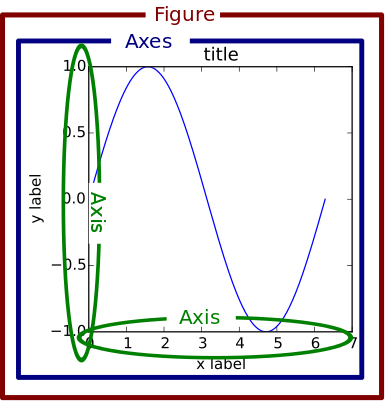

Terdapat fungsi-fungsi lain untuk Axes, seperti:

* Axes.set_xlabel()
* Axes.set_ylabel()
* Axes.set_xlim()
* Axes.set_ylim()
* Axes.set_xticks()
* Axes.set_yticks()
* Axes.set_xticklabels()
* Axes.set_yticklabels()
* Axes.set_title()
* Axes.tick_params()

**CONTOH**

(Hanya mau nunjukkin kegunaan dari fungsi di axes aja)

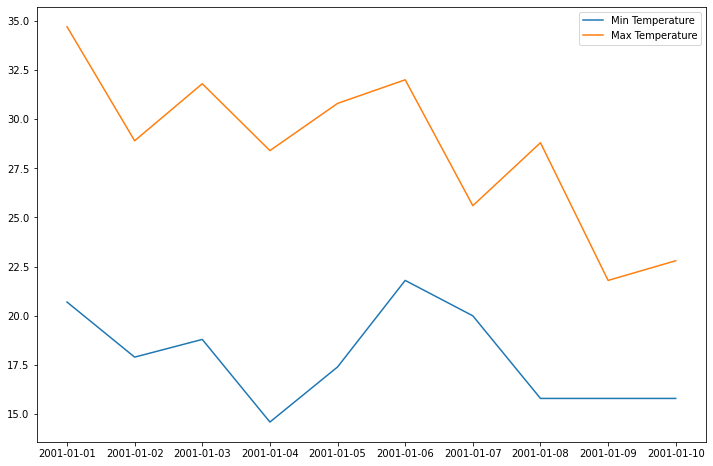

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dates = [
    '2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
    '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 17.4, 21.8, 20.0, 15.8, 15.8, 15.8]
max_temperature = [34.7, 28.9, 31.8, 28.4, 30.8, 32.0, 25.6, 28.8, 21.8, 22.8]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
#nrows=1, ncols=1, berarti membuat figure yang dapat memuat 1 axes saja (1x1)

axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()

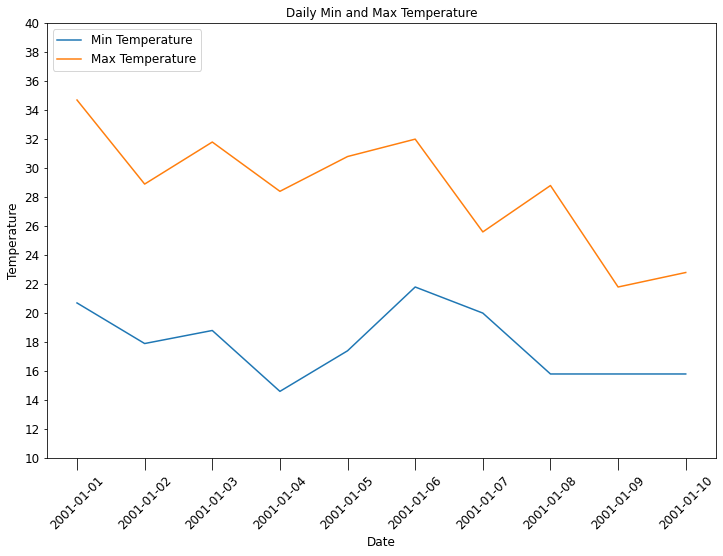

In [2]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))     #membuat figure dan axes  
axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label='Max Temperature')

axes.set_xlabel('Date',fontsize=12)
axes.set_ylabel('Temperature',fontsize=12)

axes.set_title('Daily Min and Max Temperature',fontsize=12)

axes.set_xticks(dates)
axes.set_xticklabels(dates)
axes.tick_params('x', labelsize=12, labelrotation=45, size=12)


axes.set_ylim(10,40)
axes.set_yticks(np.arange(10,41,2))
axes.tick_params('y',labelsize=12)

axes.legend(fontsize=12,loc='upper left')

## Cara Membuat Plot (secara umum)





Secara umum ada 2 cara untuk membuat plot:

1.   Membuat plot dari data secara langsung
2.   Membuat kanvas kosong, baru ditambahkan plotnya

Berikut akan ditunjukkan perbedaannya

#### **Membuat plot dari data secara langsung**

Misalkan kita punya data frame *df* . Maka akan langsung dibuat plotnya berdasarkan data frame tersebut. Ada 2 cara untuk membuat plotnya, yaitu:


```
df.plot(data_sumbu_x, data_sumbu_y, jenis plot [kind],...)
```

```
df.plot.[kind](data_sumbu_x, data_sumbu_y)
```
Contoh:









   Tanggal  Jumlah Kasus  Jumlah Kumulatif
0        1           433               433
1        2           292               725
2        3           349              1074
3        4           395              1469
4        5           484              1953


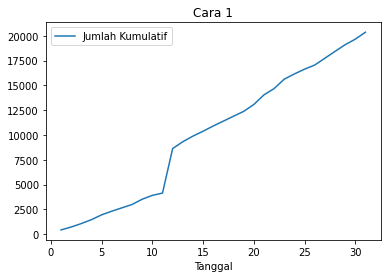

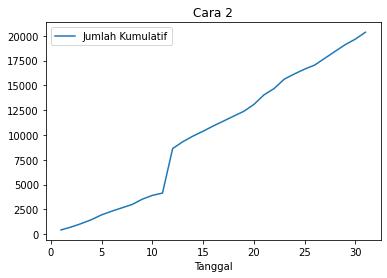

In [24]:
#Data
data_corona={'Tanggal':list(range(1,32)),"Jumlah Kasus":[433,292,349,395,484,367,338,336,533,387,233,4484,689,568,490,529,489,496,486,693,973,634,949,526,479,415,686,687,678,557,700]}
data=pd.DataFrame(data_corona)
data['Jumlah Kumulatif']=data["Jumlah Kasus"].cumsum()
print(data.head())

#Cara 1
data.plot(x='Tanggal',y='Jumlah Kumulatif',kind='line')
plt.title('Cara 1')
plt.show()

#Cara 2
data.plot.line(x='Tanggal',y='Jumlah Kumulatif')
plt.title('Cara 2')
plt.show()

#### **Membuat plot dari kanvas kosong**

Pada cara ini, kita akan buat dulu figure (kanvas kosongnya), kemudian baru tambahkan plot yang diinginkan.


```
plt.figure(*params*) # Buat kanvasnya
plt.[kind](data_sumbu_x, data_sumbu_y, data_frame,...) #Baru tambahin plotnya
```

Mungkin terlihat bahwa cara ini tidak terlalu berbeda dengan cara-cara sebelumnya, namun nanti ketika kita membuat subplot, dapat dilihat bahwa cara ini merupakan cara yang serba guna.

Contoh:

Text(0.5, 1.0, 'Cara 3 - no df')

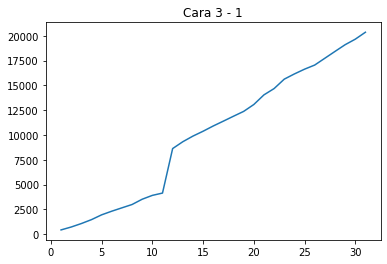

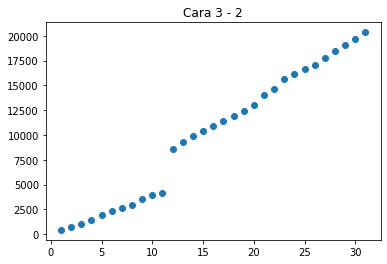

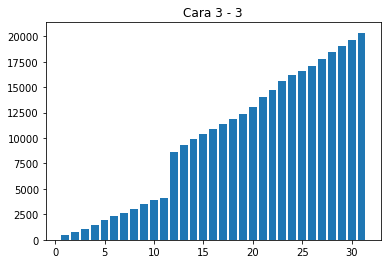

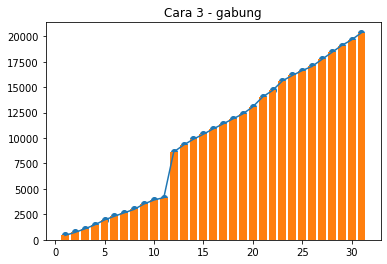

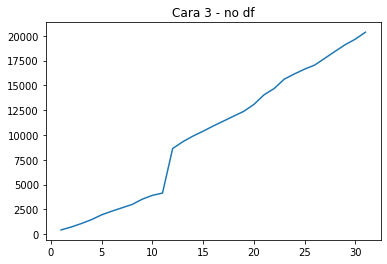

In [42]:
#Cara 3 - line
plt.figure() #buat kanvas
plt.plot('Tanggal','Jumlah Kumulatif',data=data) 
plt.title('Cara 3 - 1')

#Cara 3 - scatter
plt.figure() #buat kanvas
plt.scatter('Tanggal','Jumlah Kumulatif',data=data) 
plt.title('Cara 3 - 2')

#Cara 3 - barplot
plt.figure() #buat kanvas
plt.bar('Tanggal','Jumlah Kumulatif',data=data) 
plt.title('Cara 3 - 3')

#Jika kita tidak pisahkan 3 plot di atas dengan 'plt.figure()' 
plt.figure() #buat kanvas
plt.plot('Tanggal','Jumlah Kumulatif',data=data) 
plt.scatter('Tanggal','Jumlah Kumulatif',data=data) 
plt.bar('Tanggal','Jumlah Kumulatif',data=data) 
plt.title('Cara 3 - gabung')

#Cara 3 - tanpa menggunakan data frame
x=data['Tanggal']
y=data['Jumlah Kumulatif']
plt.figure()
plt.plot(x,y)
plt.title('Cara 3 - no df')
#jadi cara 3 dapat digunakan tanpa mempunyai data frame, yang tidak bisa dilakukan di cara 3

## Cara Membuat Subplot

Terdapat 2 cara untuk membuat subplot (Banyak plot/axes dalam 1 figure):

1.   Tidak mendefinisikan jumlah subplot
2.   Mendefinisikan jumlah subplot di awal



#### **Tidak mendefinisikan jumlah subplot**

Cara ini merupakan pengembangan dari cara 3 di atas. Pada bagian ini akan dapat dilihat bahwa cara 3 merupakan cara yang serba guna karena bisa digunakan untuk plot biasa maupun subplot.



```
fig = plt.figure() #Buat kanvas dan beri nama variabel (fig)
ax_0 = plt.add_subplot(a,b,1) # Tambahkan subplot 1 (jumlah baris = a, jumlah kolom = b, plot pertama)
ax_1 = plt.add_subplot(a,b,2) # Tambahkan subplot 2 (jumlah baris = a, jumlah kolom = b, plot kedua)
...
ax_n = plt.add_subplot(a,b,n) # Tambahkan subplot n (jumlah baris = a, jumlah kolom = b, plot ke-n)

#Subplot ke-n
df.plot(data_sumbu_x, data_sumbu_y, jenis plot [kind],ax=ax_n)

```

Perhatikan bahwa jumlah subplot pada cara ini ditentukan oleh a dan b. 

Contoh:

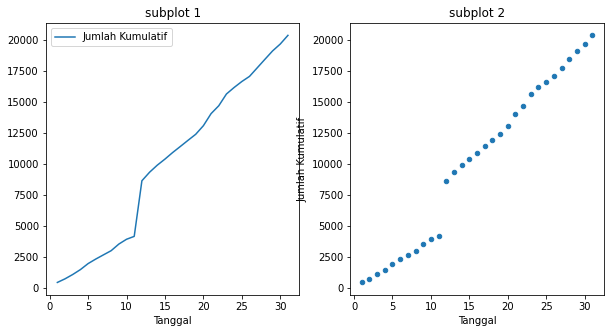

In [47]:
fig = plt.figure(figsize=(10,5)) # Membuat figure

ax0 = fig.add_subplot(1, 2, 1) # Tambahkan subplot 1 (1 row, 2 columns, plot pertama)
ax1 = fig.add_subplot(1, 2, 2) # Tambahkan subplot 2 (1 row, 2 columns, plot kedua)

# Subplot 1
data.plot(x='Tanggal',y='Jumlah Kumulatif',kind='line',ax=ax0)
ax0.set_title('subplot 1')

# Subplot 2: Line plot
data.plot(x='Tanggal',y='Jumlah Kumulatif',kind='scatter',ax=ax1)
ax1.set_title('subplot 2')

plt.show()

#### **Mendefinisikan jumlah subplot di awal**

Pada cara ini, jumlah subplot didefinisikan di awal, bukan pada penambahan axes.


```
# Cara 1
fig, axes = plt.subplots(nrow, ncol) #buat kanvas dan definisikan jumlah subplots
axes[a, b].[kind/jenis plot](x, y) #tambahkan axes pada posisi yang diinginkan (a,b)

# Cara 2
f, (ax1, ax2, ..., ax_n) = plt.subplots(nrow, ncol) #buat kanvas dan definisikan jumlah subplots, perhatikan bahwa nrow x ncol = n
ax_n.[kind/jenis plot](x, y)  #tambahkan axes ke-n


```
Contoh:

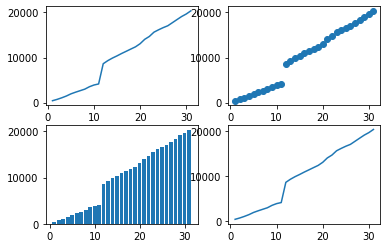

In [88]:
#Cara 1
fig, axs = plt.subplots(2, 2) #buat kanvas dan definisikan jumlah subplots

axs[0,0].plot('Tanggal','Jumlah Kumulatif',data=data)
axs[0,1].scatter(x='Tanggal',y='Jumlah Kumulatif',data=data)
axs[1,0].bar('Tanggal','Jumlah Kumulatif',data=data)
axs[1,1].plot('Tanggal','Jumlah Kumulatif',data=data)
plt.show()

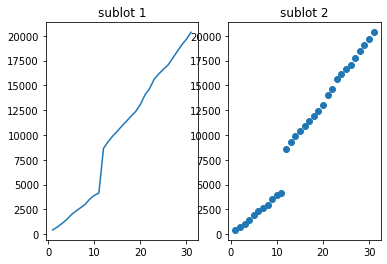

In [90]:
#Cara 2
fig, (ax1,ax2) = plt.subplots(1, 2) #buat kanvas dan definisikan jumlah subplots

ax1.plot('Tanggal','Jumlah Kumulatif',data=data)
ax1.set_title('sublot 1')
ax2.scatter(x='Tanggal',y='Jumlah Kumulatif',data=data)
ax2.set_title('sublot 2')
plt.show()